### __고급대기과학 파이썬 시각화 실습__

## __ Grib file 읽기__ (@Yeji Choi)
### 2022.03.26

1. 환경설정
1. 필수 라이브러리
1. 기본 문법

### __1. Library install__   
`
pip install pygrib
`

In [2]:
!pip install pygrib

     |████████████████████████████████| 16.5 MB 25.0 MB/s 
     |████████████████████████████████| 6.3 MB 67.2 MB/s 


In [3]:
import os, sys, subprocess, glob, h5py, time
import pygrib
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path='/content/drive/MyDrive/Colab Notebooks/'
grbs=pygrib.open(path+'gfs.0p25.2020093000.f000.grib2')
grb = grbs.select()[:]
print(grb)

[1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009300000, 2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009300000, 3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009300000, 4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009300000, 5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202009300000, 6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202009300000, 7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202009300000, 8:U component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 202009300000, 9:V component of wind:m s**-1 (instant):regular_ll:planetaryBoundaryLayer:level 0:fcst time 0 hrs:from 202009300000, 10:Ventilation Rate:m**2 s**-1 (instant):re

In [6]:
len(grb) #A.shape=(3,2,2), len(A)=3 

522

In [7]:
grb[314].keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'secti

In [8]:
for g in grb:
        print(g.typeOfLevel,':', g.name,':', g.validDate,':', g.analDate,':', g.forecastTime)

hybrid : Cloud mixing ratio : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
hybrid : Ice water mixing ratio : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
hybrid : Rain mixing ratio : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
hybrid : Snow mixing ratio : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
hybrid : Graupel (snow pellets) : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
atmosphere : Maximum/Composite radar reflectivity : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
surface : Visibility : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
planetaryBoundaryLayer : U component of wind : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
planetaryBoundaryLayer : V component of wind : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
planetaryBoundaryLayer : Ventilation Rate : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
surface : Wind speed (gust) : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
isobaricInPa : Geopotential Height : 2020-09-30 00:00:00 : 2020-09-30 00:00:00 : 0
isobaricInPa

In [9]:
grbs.select(name='Temperature')

[13:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202009300000,
 17:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 202009300000,
 23:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 202009300000,
 29:Temperature:K (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 0 hrs:from 202009300000,
 35:Temperature:K (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 202009300000,
 41:Temperature:K (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 0 hrs:from 202009300000,
 47:Temperature:K (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 0 hrs:from 202009300000,
 54:Temperature:K (instant):regular_ll:isobaricInhPa:level 1500 Pa:fcst time 0 hrs:from 202009300000,
 58:Temperature:K (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 0 hrs:from 202009300000,
 65:Temperature:K (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 0 hrs:from 20

In [10]:
tmp1 = grbs.select(name='Temperature',typeOfLevel='isobaricInhPa', level=850)
tmp2 = grbs.select(name='Geopotential Height',typeOfLevel='isobaricInhPa', level=850)
tmp1, tmp2

([315:Temperature:K (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 202009300000],
 [314:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 202009300000])

In [11]:
def readgfs(gfs_filename,i_var):
    #print(i_var)
    i_var=i_var-1
    grbs=pygrib.open(gfs_filename)
    grb = grbs.select()[:]
    print(grb[i_var])
    var=grb[i_var].name
    data_org=grb[i_var].values
    lats,lons=grb[i_var].latlons()
    unit=grb[i_var].units
    data=data_org
    print(np.min(data), np.max(data))
    data=np.where(data>0.1,data,0)
    print(data.shape, flush=True)
    min_lon=90
    max_lon=160
    min_lat=10
    max_lat=60
    print(lats.shape, lons.shape)
    m_po,_=lats.shape
    m_po=int(m_po/2)
    mask_lon=(lons[m_po,:] >=min_lon)&(lons[m_po,:]<=max_lon)
    mask_lat=(lats[:,m_po]>=min_lat)&(lats[:,m_po]<=max_lat)
    print(mask_lon.shape,mask_lat.shape,flush=True)
    m_data=data[mask_lat,:]
    m_data=m_data[:,mask_lon]
    m_lon=lons[mask_lat,:]
    m_lon=m_lon[:,mask_lon]
    m_lat=lats[mask_lat,:]
    m_lat=m_lat[:,mask_lon]
    print(m_lon.shape, m_lat.shape, m_data.shape)
    return m_lon, m_lat, m_data, var, unit

In [12]:
def plot_background(ax):
    ax.set_extent([90,160,10,60.],crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.STATES, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    return ax

In [14]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip uninstall shapely
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (186 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

315:Temperature:K (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 202009300000
224.10000000000002 305.90000000000003
(721, 1440)
(721, 1440) (721, 1440)
(1440,) (721,)
(201, 281) (201, 281) (201, 281)
(201, 281) (201, 281) (201, 281)
262.7 305.90000000000003


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


314:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 85000 Pa:fcst time 0 hrs:from 202009300000
797.6746875 1656.3946875000001
(721, 1440)
(721, 1440) (721, 1440)
(1440,) (721,)
(201, 281) (201, 281) (201, 281)
(201, 281) (201, 281) (201, 281)
1343.5466875 1561.1786875


/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


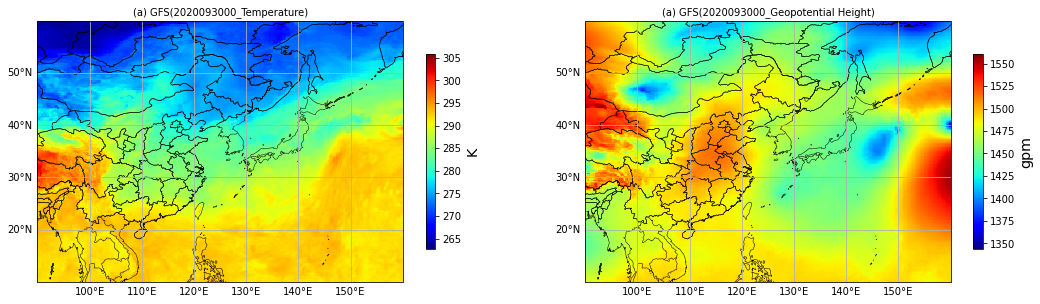

In [17]:
crs=ccrs.PlateCarree(central_longitude=130,globe=None)
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(18, 9),
                          subplot_kw={'projection': crs})
axlist = axarr.flatten()
no=0
idx=[315,314]

path='/content/drive/MyDrive/Colab Notebooks/'
for ax in axlist:
    plot_background(ax)
    lon, lat, data, var, unit = readgfs(path+'gfs.0p25.2020093000.f000'+'.grib2',idx[no])
    print(lon.shape, lat.shape, data.shape)
    date='2020093000'
    cmp='jet'
    vmin=np.min(data)
    vmax=np.max(data)
    print(vmin, vmax)
    #data=np.expand_dims(data, axis=-1)
    #print(data.shape)
    cf1 = ax.pcolormesh(lon, lat, data, cmap='jet', transform=ccrs.PlateCarree(),vmin=vmin, vmax=vmax)
                                
    ax.set_title('(a) GFS('+date+'_'+var+')', fontsize=10) 
    cbar = fig.colorbar(cf1, ax=axlist[no], orientation="vertical", 
                        pad=0.05,shrink=0.4) #, ticks=range(mindata, maxdata))
    cbar.set_label(unit, size='x-large')
    gl=ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10}
    gl.ylabel_style = {'size': 10}
    no=no+1
plt.show()